In [2]:
import keras
import tensorflow
import os
from keras.layers import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from keras.layers import BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
from keras.models import Model
from sklearn.utils import shuffle
from cv2 import imread
import numpy as np
import pandas as pd

In [3]:
data = []
labels = []
width,height=150,150

imagePaths = list(paths.list_images('C:\Jupyters\envr\Scripts\diabetic_retinopathy\colored_images'))
data = []
labels = []

for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    #print(imagePath)
    image = load_img(imagePath, target_size=(width, height))
    image = img_to_array(image)
    data.append(image)
    labels.append(label)

data = np.array(data, dtype="float32")
labels = np.array(labels)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)
#labels = to_categorical(labels)

data, labels = shuffle(data, labels)

print(data.shape)
print(labels.shape)

(3662, 150, 150, 3)
(3662, 5)


In [4]:
test_ratio = 0.25

# train is now 75% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=test_ratio)

print("Train images:",x_train.shape)
print("Test images:",x_test.shape)
print("Train label:",y_train.shape)
print("Test label:",y_test.shape)

Train images: (2746, 150, 150, 3)
Test images: (916, 150, 150, 3)
Train label: (2746, 5)
Test label: (916, 5)


In [5]:
from keras.applications.vgg16 import VGG16
from keras import layers

vgg16 = VGG16(weights="C:\Jupyters\envr\Scripts\weights.h5", include_top=False, input_shape= (150,150,3)) 

model = Sequential()
model.add(vgg16)
model.add(layers.Flatten())
model.add(layers.Dense(100, activation = 'relu'))
model.add(layers.Dense(5, activation = 'sigmoid'))

opt = Adam(learning_rate = 1e-4)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 100)               819300    
                                                                 
 dense_1 (Dense)             (None, 5)                 505       
                                                                 
Total params: 15,534,493
Trainable params: 15,534,493
Non-trainable params: 0
_________________________________________________________________


In [ ]:
filepath='best_model__vgg.h5'
model.fit(x_train ,y_train ,epochs=25)
model.save(filepath)

Epoch 1/25
 2/86 [..............................] - ETA: 11:48 - loss: 2.7725 - accuracy: 0.2969

[INFO] evaluating network...
86/86 [==============================] - 143s 2s/step

Trainig Accuracy Score:- 98.36125273124546

Testing Accuracy Score:- 78.16593886462883

Traning Graph:- 
 


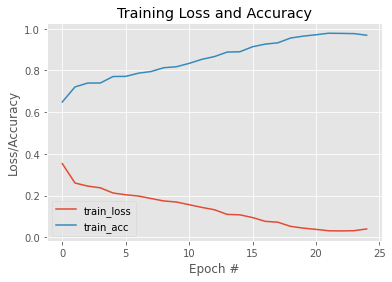

In [6]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import scikitplot as skplt
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn import metrics

predIdxs = model.predict(x_test, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)

trainpredIdxs = model.predict(x_train, batch_size=BS)
trainpredIdxs = np.argmax(trainpredIdxs, axis=1)

trainScore=accuracy_score(trainpredIdxs,y_train.argmax(axis=1))*100
Score=accuracy_score(predIdxs,y_test.argmax(axis=1))*100

print("\nTrainig Accuracy Score:-",trainScore)
print("\nTesting Accuracy Score:-",Score)
print("\nTraning Graph:- \n ")

# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), h.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), h.history["accuracy"], label="train_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left",)
plt.show()

In [7]:
mild = []
No_DR = []
Moderate = []
Severe = []
Proliferate_DR = []

mild_labels = []
No_DR_labels = []
Moderate_labels = []
Severe_labels = []
Proliferate_DR_labels = []

width,height=150,150
for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    if(label == 'Mild'):
        image = load_img(imagePath, target_size=(width, height))
        image = img_to_array(image)
        mild.append(image)
        mild_labels.append(0)
    if(label == 'No_DR'):
        image = load_img(imagePath, target_size=(width, height))
        image = img_to_array(image)
        No_DR.append(image)
        No_DR_labels.append(2)
    if(label == 'Moderate'):
        image = load_img(imagePath, target_size=(width, height))
        image = img_to_array(image)
        Moderate.append(image)
        Moderate_labels.append(1)
    if(label == 'Severe'):
        image = load_img(imagePath, target_size=(width, height))
        image = img_to_array(image)
        Severe.append(image)
        Severe_labels.append(4)
    if(label == 'Proliferate_DR'):
        image = load_img(imagePath, target_size=(width, height))
        image = img_to_array(image)
        Proliferate_DR.append(image)
        Proliferate_DR_labels.append(3)
    
mild = np.array(mild, dtype="float32")
No_DR = np.array(No_DR, dtype="float32")
Moderate = np.array(Moderate, dtype="float32")
Severe = np.array(Severe, dtype="float32")
Proliferate_DR = np.array(Proliferate_DR, dtype="float32")

In [10]:
extract = Model(model.inputs, model.layers[-3].output)

#del(data)
#del(labels)
feat_train  = extract.predict(x_train)  
feat_test = extract.predict(x_test)      

print(feat_train.shape)

29/29 [==============================] - 46s 2s/step
(2746, 8192)


## SVM

In [12]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(feat_train,np.argmax(y_train,axis=1))

TrainSVMScore=svm.score(feat_train,np.argmax(y_train,axis=1))*100
print("SVM Training Accuracy Score:-",TrainSVMScore)

TestSVMScore=svm.score(feat_test,np.argmax(y_test,axis=1))*100
print("\nSVM Testing Accuracy Score:-",TestSVMScore)

SVM Training Accuracy Score:- 99.19883466860888

SVM Testing Accuracy Score:- 78.7117903930131


## Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(feat_train,np.argmax(y_train,axis=1))

TrainDecisionScore=clf.score(feat_train,np.argmax(y_train,axis=1))*100
print("Decision Tree Training Accuracy Score:-",TrainDecisionScore)


TestDecisionScore=clf.score(feat_test,np.argmax(y_test,axis=1))*100
print("\nDecision Tree Testing Accuracy Score:-",TestDecisionScore)

Decision Tree Training Accuracy Score:- 99.2352512745812

Decision Tree Testing Accuracy Score:- 73.0349344978166


## KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(feat_train,np.argmax(y_train,axis=1))

TrainKNNScore=knn.score(feat_train,np.argmax(y_train,axis=1))*100
print("KNN Training Accuracy Score:-",TrainKNNScore)

TestKNNScore=knn.score(feat_test,np.argmax(y_test,axis=1))*100
print("\nKNN Testing Accuracy Score:-",TestKNNScore)

KNN Training Accuracy Score:- 97.01383831026948

KNN Testing Accuracy Score:- 78.60262008733623


In [16]:
mild_fit = extract.predict(mild)  
No_DR_fit = extract.predict(No_DR)  
Moderate_fit = extract.predict(Moderate)  
Severe_fit = extract.predict(Severe)  
Proliferate_DR_fit = extract.predict(Proliferate_DR)  

mild_knn_score = knn.score(mild_fit,mild_labels)*100
No_DR_knn_score = knn.score(No_DR_fit,No_DR_labels)*100
Moderate_knn_score = knn.score(Moderate_fit,Moderate_labels)*100
Severe_knn_score = knn.score(Severe_fit,Severe_labels)*100
Proliferate_DR_knn_score = knn.score(Proliferate_DR_fit,Proliferate_DR_labels)*100

print("\nKNN Mild Accuracy Score:-",mild_knn_score)
print("\nKNN NO DR Accuracy Score:-",No_DR_knn_score)
print("\nKNN Moderate Accuracy Score:-",Moderate_knn_s
      core)
print("\nKNN Severe Accuracy Score:-",Severe_knn_score)
print("\nKNN Proliferate DR Accuracy Score:-",Proliferate_DR_knn_score)

10/10 [==============================] - 23s 2s/step

KNN Mild Accuracy Score:- 84.86486486486487

KNN NO DR Accuracy Score:- 99.16897506925207

KNN Moderate Accuracy Score:- 93.1931931931932

KNN Severe Accuracy Score:- 64.24870466321244

KNN Proliferate DR Accuracy Score:- 76.27118644067797


## Gaussian Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(feat_train,np.argmax(y_train,axis=1))

TrainNBScore=gnb.score(feat_train,np.argmax(y_train,axis=1))*100
print("\nGaussianNaive Bayes Training Accuracy Score:-",TrainNBScore)

TestNBScore=gnb.score(feat_test,np.argmax(y_test,axis=1))*100
print("\nGaussianNaive Bayes Testing Accuracy Score:-",TestNBScore)


GaussianNaive Bayes Training Accuracy Score:- 70.35688273852877

GaussianNaive Bayes Testing Accuracy Score:- 56.00436681222707


In [18]:
print("--Training Accuracy..")
print("VGG Accuracy:- {:.2f} %".format(trainScore))
print("VGG-SVM Accuracy:- {:.2f} %".format(TrainSVMScore))
print("VGG-DT Accuracy:- {:.2f} %".format(TrainDecisionScore))
print("VGG-KNN Accuracy:- {:.2f} %".format(TrainKNNScore))
print("VGG-NB Accuracy:- {:.2f} %".format(TrainNBScore))

print("\n--Testing Accuracy..")
print("VGG Accuracy:- {:.2f} %".format(Score))
print("VGG-SVM Accuracy:- {:.2f} %".format(TestSVMScore))
print("VGG-DT Accuracy:- {:.2f} %".format(TestDecisionScore))
print("VGG-KNN Accuracy:- {:.2f} %".format(TestKNNScore))
print("VGG-NB Accuracy:- {:.2f} %".format(TestNBScore))

--Training Accuracy..
VGG Accuracy:- 98.47 %
VGG-SVM Accuracy:- 99.31 %
VGG-DT Accuracy:- 99.31 %
VGG-KNN Accuracy:- 97.01 %
VGG-NB Accuracy:- 91.33 %

--Testing Accuracy..
VGG Accuracy:- 78.17 %
VGG-SVM Accuracy:- 78.71 %
VGG-DT Accuracy:- 72.38 %
VGG-KNN Accuracy:- 80.24 %
VGG-NB Accuracy:- 71.07 %
